# Progetto finale: Predizione della concentrazione di PM2.5 nell'aria

https://www.airnow.gov/aqi/aqi-calculator-concentration/

https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data

# Acquisizione dati

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
url = 'https://raw.githubusercontent.com/giovanni-andreella/final_project_AML_andreella-dapra-ghiotto/refs/heads/main/PRSA_data_2010.1.1-2014.12.31.csv'
dataset = pd.read_csv(url)

# Data Wrangling

Visualizing dataset to acknowledge the number of predictors.

In [ ]:
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
dataset.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

Cambiamento dei nomi delle colonne poco chiare

In [ ]:
# renaming columns
dataset = dataset.rename(columns={
    'DEWP': 'dew_point',
    'TEMP': 'temperature',
    'PRES': 'pressure',
    'cbwd': 'wind_direction',
    'Iws': 'cumulated_wind_speed',
    'Is': 'snow',
    'Ir': 'rain'
})

dataset.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'dew_point',
       'temperature', 'pressure', 'wind_direction', 'cumulated_wind_speed',
       'snow', 'rain'],
      dtype='object')

E' stata cancellata la colonna relative a No in quanto era una ripetizione del numero di riga del dataset. Successive colonne verranno eventualmente eliminate dopo aver verificato una assenza di trend evidenti dopo una prima analisi e visualizzazione dei dati.

In [ ]:
dataset.drop(['No'], axis=1, inplace=True)

dataset.head()

,year,month,day,hour,pm2.5,dew_point,temperature,pressure,wind_direction,cumulated_wind_speed,snow,rain
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Data la mancanza del dato da prevedere `pm2.5` nelle prime osservazioni del dataset, usiamo la funzione `count()` per ottenere il numero di dati mancanti.

In [ ]:
dataset.count()

,0
year,43824
month,43824
day,43824
hour,43824
pm2.5,41757
dew_point,43824
temperature,43824
pressure,43824
wind_direction,43824
cumulated_wind_speed,43824


// Mancano 2067 osservazioni della colonna `pm2.5`. Essendo questo il valore predetto utile ad un supervised training, eliminiamo tutte le righe in cui la predizione è un Not a Number (`NaN`)



// da fare: commento sul perchè abbiamo lasciato le NaN

Visualizziamo i tipi di dati dei predittori per valutare conversioni da variabili di tipo oggetto a variabili quantitative. Successivamente rielaboriamo alcune colonne e creiamo dummy variables.

In [ ]:
print(dataset.dtypes)

year                      int64
month                     int64
day                       int64
hour                      int64
pm2.5                   float64
dew_point                 int64
temperature             float64
pressure                float64
wind_direction           object
cumulated_wind_speed    float64
snow                      int64
rain                      int64
dtype: object


## Handling categorical attributes

In [ ]:
dataset['wind_direction'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [ ]:
dataset['wind_direction'] = dataset['wind_direction'].astype('category')
print(dataset.dtypes)

year                       int64
month                      int64
day                        int64
hour                       int64
pm2.5                    float64
dew_point                  int64
temperature              float64
pressure                 float64
wind_direction          category
cumulated_wind_speed     float64
snow                       int64
rain                       int64
dtype: object


# Visualizzazione

Visualizziamo i dati in modo da cercare trend e correlazioni evideneti tra predittori e risultato

<ipython-input-89-769123298>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


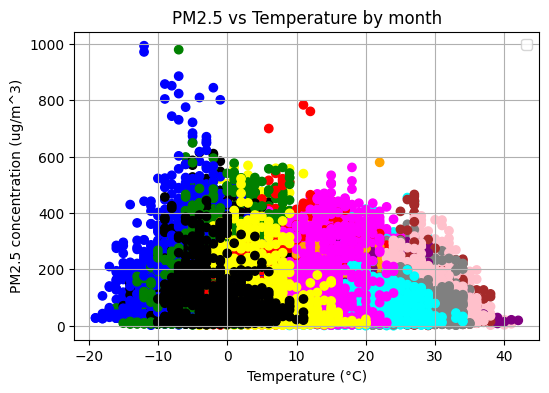

In [ ]:
colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan',
    10: 'magenta',
    11: 'yellow',
    12: 'black'
}

plt.figure(figsize=(6, 4))
plt.scatter(dataset['temperature'], dataset['pm2.5'], c=dataset['month'].map(colors))
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 concentration (ug/m^3)')
plt.title('PM2.5 vs Temperature by month')
plt.grid(True)
plt.legend()
plt.show()

Indaghiamo una possibile relazione tra le temperature medie nei mesi e la concentrazione di PM2.5.

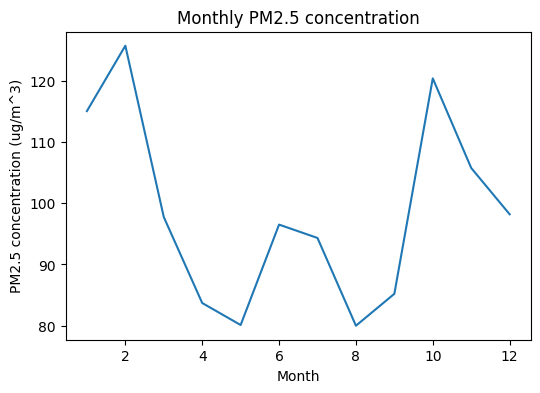

In [ ]:
monthly_avg = dataset.groupby('month')[['pm2.5']].mean()

plt.figure(figsize=(6, 4))
plt.plot(monthly_avg.index, monthly_avg['pm2.5'])
plt.xlabel('Month')
plt.ylabel('PM2.5 concentration (ug/m^3)')
plt.title('Monthly PM2.5 concentration')
plt.show()

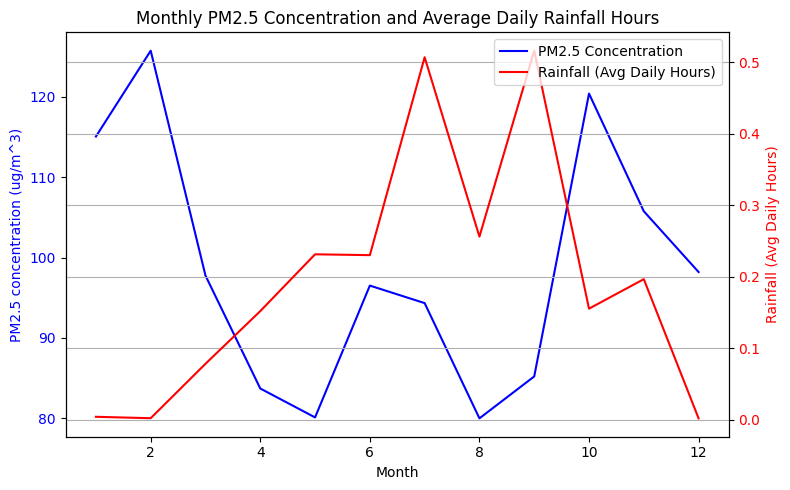

In [ ]:
# Calcola la media mensile di pm2.5 (assumendo che monthly_avg sia già calcolato)
# Se non lo hai già fatto, esegui questo:
monthly_avg = dataset.groupby('month')[['pm2.5']].mean()


# Calcola la piovosità media mensile dal dataset originale
# 'rain' qui rappresenta le ore di pioggia cumulata al giorno
monthly_avg_rain = dataset.groupby('month')[['rain']].mean()

# Crea la figura e gli assi
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot PM2.5 medio sul primo asse Y
ax1.plot(monthly_avg.index, monthly_avg['pm2.5'], color='blue', label='PM2.5 Concentration')
ax1.set_xlabel('Month')
ax1.set_ylabel('PM2.5 concentration (ug/m^3)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crea un secondo asse Y che condivide lo stesso asse X (mesi)
ax2 = ax1.twinx()

# Plot piovosità media sul secondo asse Y
ax2.plot(monthly_avg_rain.index, monthly_avg_rain['rain'], color='red', label='Rainfall (Avg Daily Hours)') # Aggiornata l'etichetta
ax2.set_ylabel('Rainfall (Avg Daily Hours)', color='red') # Aggiornata l'etichetta
ax2.tick_params(axis='y', labelcolor='red')

# Aggiungi un titolo e una griglia
plt.title('Monthly PM2.5 Concentration and Average Daily Rainfall Hours') # Aggiornato il titolo
fig.tight_layout() # Assicura che le etichette non si sovrappongano

# Mostra la legenda (potrebbe essere necessario regolarne la posizione)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Mostra il grafico
plt.grid(True)
plt.show()

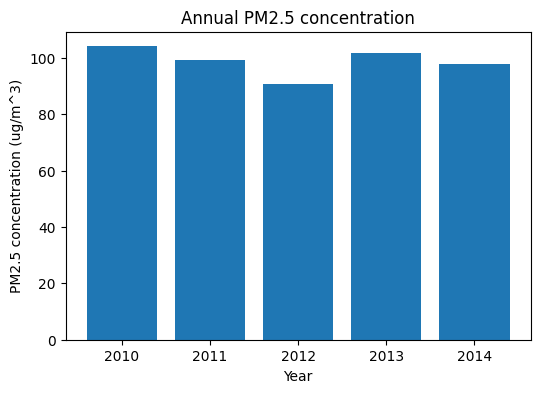

In [ ]:
annual_avg = dataset.groupby('year')[['pm2.5']].mean()

plt.figure(figsize=(6, 4))
plt.bar(annual_avg.index, annual_avg['pm2.5'])
plt.xlabel('Year')
plt.ylabel('PM2.5 concentration (ug/m^3)')
plt.title('Annual PM2.5 concentration')
plt.show()

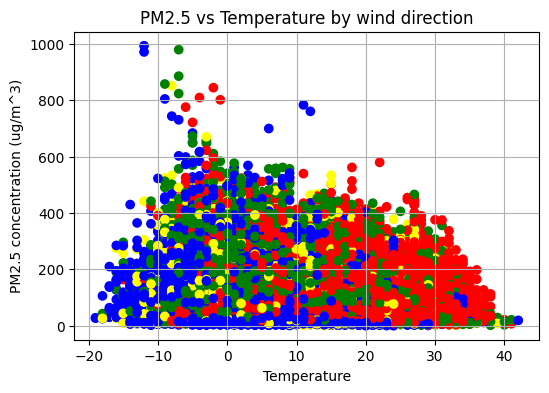

In [ ]:
color_map = {
    'SE': 'red',
    'cv': 'green',
    'NW': 'blue',
    'NE': 'yellow'
}

plt.figure(figsize=(6, 4))
plt.scatter(dataset['temperature'], dataset['pm2.5'], c=dataset['wind_direction'].map(color_map))
plt.xlabel('Temperature')
plt.ylabel('PM2.5 concentration (ug/m^3)')
plt.title('PM2.5 vs Temperature by wind direction')
plt.grid(True)
plt.show()

In [ ]:
dataset.count()

,0
year,43824
month,43824
day,43824
hour,43824
pm2.5,41757
dew_point,43824
temperature,43824
pressure,43824
wind_direction,43824
cumulated_wind_speed,43824


In [ ]:
color_aqi = {
    'Good': 'green',
    'Moderate': 'yellow',
    'UnhealthyForSensitives': 'orange',
    'Unhealthy': 'red',
    'VeryUnhealthy': 'purple',
    'Hazardous': 'brown'
}

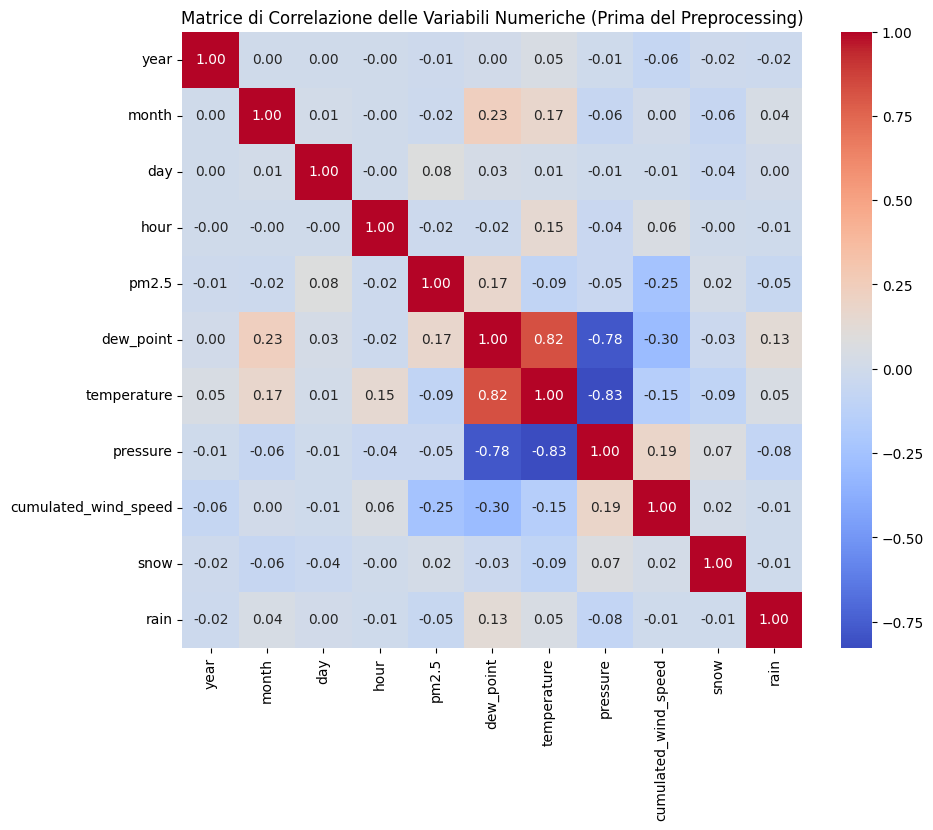

In [ ]:
numeric_cols_for_corr = dataset.select_dtypes(include=np.number).columns.tolist()

# Potresti voler escludere colonne temporali o altre che non hanno un significato lineare nella correlazione
# Esempio:
# cols_to_exclude = ['year', 'month', 'day', 'hour']
# numeric_cols_for_corr = [col for col in numeric_cols_for_corr if col not in cols_to_exclude]

# Calcola la matrice di correlazione per le colonne numeriche selezionate
correlation_matrix = dataset[numeric_cols_for_corr].corr()

# Visualizza la heatmap della matrice di correlazione
plt.figure(figsize=(10, 8)) # Puoi regolare le dimensioni
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True per mostrare i valori, fmt per il formato decimale
plt.title('Matrice di Correlazione delle Variabili Numeriche (Prima del Preprocessing)')
plt.show()

In [ ]:
# Seleziona solo le colonne numeriche dal dataset originale
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()

# Rimuovi colonne che non vuoi includere nella tabella (es. 'No', se non è già stata rimossa)
# Assumiamo 'No' sia già stata rimossa come nel tuo notebook.
# Se hai altre colonne da escludere (es. quelle temporali se vuoi solo i predittori), aggiungile qui:
cols_to_exclude = ['No'] # Esempio: se 'No' fosse ancora presente
numeric_cols_for_table = [col for col in numeric_cols if col not in cols_to_exclude]

# Calcola la descrizione statistica per le colonne numeriche selezionate
description = dataset[numeric_cols_for_table].describe()

# Seleziona le righe per 'min' e 'max'
range_table = description.loc[['min', 'max']]

# Trasponi la tabella per avere i predittori come righe
range_table = range_table.T

# Rinominare le colonne per chiarezza (opzionale)
range_table.columns = ['Minimum', 'Maximum']

# Stampa la tabella
print("Range di Variazione dei Predittori Numerici (Prima della Pipeline):")
print(range_table)

Range di Variazione dei Predittori Numerici (Prima della Pipeline):
                      Minimum  Maximum
year                  2010.00   2014.0
month                    1.00     12.0
day                      1.00     31.0
hour                     0.00     23.0
pm2.5                    0.00    994.0
dew_point              -40.00     28.0
temperature            -19.00     42.0
pressure               991.00   1046.0
cumulated_wind_speed     0.45    585.6
snow                     0.00     27.0
rain                     0.00     36.0


# Pipeline

In [ ]:
# importazione librerie necessarie
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_cols = ['year', 'month', 'day', 'hour', 'pm2.5', 'dew_point', 'temperature', 'pressure', 'snow', 'rain', 'delta_wind_speed']
categorical_cols = ['wind_direction', 'aqi']


## Pipeline 1
Creo nuova colonna delta_wind_speed e trasformo rain e snow in dummy variable

## Group By e combinazione colonne

Aggiunta colonna di delta velocità vento con un transformer

In [ ]:
# Update the DeltaWindTransformer to only add the new column
from sklearn.base import BaseEstimator, TransformerMixin

class DeltaWindTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        # Ensure 'cumulated_wind_speed' is in the input
        if 'cumulated_wind_speed' not in X_transformed.columns:
            raise ValueError("Input DataFrame must contain 'cumulated_wind_speed' column.")

        # Calculate the first value
        if len(X_transformed) > 0:
            # Use .iloc for integer-based indexing, it's safer within transform
            X_transformed.loc[0, 'delta_wind_speed'] = X_transformed.iloc[0]['cumulated_wind_speed']

        # Calcola i valori successivi
        for i in range(1, len(X_transformed)):
            X_transformed.loc[i, 'delta_wind_speed'] = X_transformed.iloc[i]['cumulated_wind_speed'] - X_transformed.iloc[i - 1]['cumulated_wind_speed']

        # Rimuovi cumulated_wind_speed dopo il calcolo
        X_transformed = X_transformed.drop(columns=['cumulated_wind_speed'])

        return X_transformed

In [ ]:
delta_wind = DeltaWindTransformer();

Raggruppamento della colonna pm2.5 in sei livelli ricavati dal sito AirNow mediante un transformer:
- 0-9: GOOD
- 10-35 MODERATE
- 36-55 UNEHEALTHY FOR SENSITIVE GROUPS
- 56-125 UNHEALTHY
- 126-225 VERY UNHEALTHY
- 226-infty HAZARDOUS

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AQICategorizer(BaseEstimator, TransformerMixin):
    def __init__(self, pm_column='pm2.5'):
        self.pm_column = pm_column
        # Definisco i limiti e le categorie AQI internamente
        self.limiti = [-1, 10, 36, 56, 126, 226, float('inf')]
        self.categorie = ['Good', 'Moderate', 'UnhealthyForSensitives', 'Unhealthy', 'VeryUnhealthy', 'Hazardous']

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Creo una copia per evitare di modificare il DataFrame originale
        X_transformed = X.copy()

        # Applichiamo la funzione pd.cut per creare la colonna 'aqi'
        X_transformed.loc[:, 'aqi'] = pd.cut(
            X_transformed[self.pm_column],
            bins=self.limiti,
            labels=self.categorie,
            right=True,
            include_lowest=True
        )

        return X_transformed

In [ ]:
aqi_categorizer = AQICategorizer(pm_column='pm2.5')

## Creazione Dummy Variables

Rimuoviamo ore di pioggia cumulata, neve cumulata e velocità cumulata del vento perchè abbiamo creato nuove colonne.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DummyCreator(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_dummy=['snow', 'rain']):
        self.columns_to_dummy = columns_to_dummy

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

        for col in self.columns_to_dummy:
            dummy_col = f'dummy_{col}'
            X_transformed[dummy_col] = (X_transformed[col] > 0).astype(int)
            X_transformed.drop(columns=col, inplace=True)

        return X_transformed

    def get_feature_names_out(self, input_features=None):
        return [f'dummy_{col}' for col in self.columns_to_dummy]


Assemblo la Pipeline 1

In [ ]:
initial_pipeline = Pipeline(steps=[
    ('delta_wind_speed', DeltaWindTransformer()), # This transformer adds 'delta_wind_speed'
    ('aqi_categorizer', AQICategorizer(pm_column='pm2.5')), # This transformer adds 'aqi'
    ('dummy_creator_meteo', DummyCreator())
])

initial_pipeline

Pipeline(steps=[('delta_wind_speed', DeltaWindTransformer()),
                ('aqi_categorizer', AQICategorizer()),
                ('dummy_creator_meteo', DummyCreator())])

In [ ]:
dataset_initial_prepared = initial_pipeline.fit_transform(dataset)

dataset_initial_prepared.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'dew_point', 'temperature',
       'pressure', 'wind_direction', 'delta_wind_speed', 'aqi', 'dummy_snow',
       'dummy_rain'],
      dtype='object')

In [ ]:
dataset_initial_prepared.head()

,year,month,day,hour,pm2.5,dew_point,temperature,pressure,wind_direction,delta_wind_speed,aqi,dummy_snow,dummy_rain
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,NaN,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,3.13,NaN,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,1.79,NaN,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,3.13,NaN,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,3.13,NaN,0,0


## Shifting dei dati

In [ ]:
# Copia del dataset originale
df = dataset_initial_prepared.copy()

# 1. PM2.5 passato: t-24 a t-1
pm25_shifted_cols = []
for i in range(24):
    colname = f'pm2.5_t-{24 - i}'
    pm25_shifted_cols.append(df['pm2.5'].shift(i).rename(colname))

# 2. PM2.5 futuro: target da t+1 a t+24
pm25_target_cols = []
for i in range(24):
    colname = f'y_pm2.5_t+{i+1}'
    pm25_target_cols.append(df['pm2.5'].shift(-i - 1).rename(colname))

# 3. Meteo shiftato: t-24 a t+23
meteo_cols = ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed']
meteo_shifted_cols = []
for col in meteo_cols:
    for i in range(-24, 24):
        colname = f'{col}_t{"" if i == 0 else (f"+{i}" if i > 0 else i)}'
        meteo_shifted_cols.append(df[col].shift(-i).rename(colname))

# 4. Concatena tutte le nuove colonne in un DataFrame
new_features = pd.concat(pm25_shifted_cols + pm25_target_cols + meteo_shifted_cols, axis=1)

# 5. Combina con l'originale
df_extended = pd.concat([df, new_features], axis=1)

# 6. Rimuovi righe con NaN introdotti dagli shift, lo faccio qui altrimenti crea guai al column transformer
df_extended = df_extended.dropna()

# Reset degli indici
df_extended = df_extended.reset_index(drop=True)



# Ora `df_extended` contiene:
# - le colonne originali (es. datetime, pm2.5, etc.)
# - le 24 ore precedenti di pm2.5
# - le 288 feature meteo shiftate
# - le 24 ore future come target


In [ ]:
df_extended.count()

,0
year,34573
month,34573
day,34573
hour,34573
pm2.5,34573
...,...
delta_wind_speed_t+19,34573
delta_wind_speed_t+20,34573
delta_wind_speed_t+21,34573
delta_wind_speed_t+22,34573


## Splitto il dataset in train e test

In [ ]:
# Ordina per tempo e split
df_extended = df_extended.sort_values(['year', 'month', 'day', 'hour']).reset_index(drop=True)
train_size = int(0.8 * len(df_extended))
dataset_train = df_extended.iloc[:train_size]
dataset_test = df_extended.iloc[train_size:]

# Resetto gli indici in modo tale da farli partire da 1
dataset_train = dataset_train.reset_index(drop=True)
dataset_test = dataset_test.reset_index(drop=True)

## Feature Scaling

Applicazione di standandirzazzione e normalizzazione per trasformare gli input in dati con le stessi ordini di grandezza.

In [ ]:
def numeric_transformer():
    return make_pipeline(
        StandardScaler())

def categorical_transformer():
    return make_pipeline(
        OneHotEncoder(handle_unknown='ignore'))

## Assembalggio pipeline 2

ho lasciato l'interpolazione per tutti i dati eccetto per pm2.5 in quanto se ci sarà il dato mancante di quest ultima verrà poi cancellata completamente la riga

In [ ]:
# Define the original columns that could be features or targets
all_possible_cols = df.columns.tolist()

# Define target columns (24 hours of future pm2.5)
target_cols = [f'y_pm2.5_t+{i+1}' for i in range(24)]

# Define features:
# - meteorological data for previous and next 24h
# - pm2.5 for previous 24h
# - current hour data
meteo_shifted_feature_cols = [
    col for col in df_extended.columns
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and ('_t+' in col or '_t-' in col or '_t' not in col)
]

pm25_shifted_feature_cols = [f'pm2.5_t-{24 - i}' for i in range(24)]

# Combine all features
feature_cols = pm25_shifted_feature_cols + meteo_shifted_feature_cols

feature_cols = [col for col in feature_cols if col ]

# Exclude targets as well
feature_cols = [col for col in feature_cols if col not in target_cols]

# Split into categorical and numeric features
# rain e snow sono categoriche????
categorical_feature_cols = [
    col for col in feature_cols if any(cat in col for cat in ['wind_direction', 'dummy_rain', 'dummy_snow'])
]
numeric_feature_cols = [col for col in feature_cols if col not in categorical_feature_cols]

In [ ]:
# Define the ColumnTransformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
     transformers=[
        ('num', numeric_transformer(), numeric_feature_cols),
        ('cat', categorical_transformer(), categorical_feature_cols)
    ],
    remainder='drop' # Drop columns not listed in transformers (like original time columns and target columns)
)

In [ ]:
# Define the full pipeline including the custom transformers and the ColumnTransformer
preprocessing_pipeline = Pipeline(steps=[
    #('delta_wind_speed', DeltaWindTransformer()), # This transformer adds 'delta_wind_speed'
    #('aqi_categorizer', AQICategorizer(pm_column='pm2.5')), # This transformer adds 'aqi'
    ('column_transformer', preprocessor) # This handles scaling/encoding and drops unwanted original columns
])

preprocessing_pipeline

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pm2.5_t-24', 'pm2.5_t-23',
                                                   'pm2.5_t-22', 'pm2.5_t-21',
                                                   'pm2.5_t-20', 'pm2.5_t-19',
                                                   'pm2.5_t-18', 'pm2.5_t-17',
                                                   'pm2.5_t-16', 'pm2.5_t-15',
                                                   'pm2.5_t-14', 'pm2.5_t-13',
                                                   'pm2.5_t-12', 'pm2.5_t-11',
                                                   'pm2.5_t-10', 'pm2.5_t-9',
                                                   'pm2.5_t-8'...
                                                   'dummy_snow_t-17',
                                                   'dummy_snow_t-16',
                                                   'dummy_snow_t-15',
                                                   'dummy_snow_t-14',
                                                   'dummy_snow_t-13',
                                                   'dummy_snow_t-12',
                                                   'dummy_snow_t-11',
                                                   'dummy_snow_t-10',
                                                   'dummy_snow_t-9',
                                                   'dummy_snow_t-8',
                                                   'dummy_snow_t-7',
                                                   'dummy_snow_t-6',
                                                   'dummy_snow_t-5',
                                                   'dummy_snow_t-4',
                                                   'dummy_snow_t-3',
                                                   'dummy_snow_t-2',
                                                   'dummy_snow_t-1',
                                                   'dummy_snow_t+1',
                                                   'dummy_snow_t+2',
                                                   'dummy_snow_t+3', ...])]))])

In [ ]:
# Fit-transform on the training set features
X_train_prepared = preprocessing_pipeline.fit_transform(dataset_train[feature_cols])

# Transform on the test set features
X_test_prepared = preprocessing_pipeline.transform(dataset_test[feature_cols])

# Define the target variables
y_train = dataset_train[target_cols]
y_test = dataset_test[target_cols]

# Display shapes to confirm output structure
print("Shape of X_train_prepared:", X_train_prepared.shape)
print("Shape of X_test_prepared:", X_test_prepared.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_prepared: (27658, 600)
Shape of X_test_prepared: (6915, 600)
Shape of y_train: (27658, 24)
Shape of y_test: (6915, 24)


Vogliamo creare un vettore in input costituito dai seguenti termini:
- dati meteorologici delle 24 ore precedenti
- dati meteorologici delle 24 ore da prevedere
- concentrazioni di PM2.5 delle 24 ore precedenti

In questo modo saremo in grado di avere un vettore di output costituito dalle previsioni di PM2.5 delle 24 ore successive.

# Training e test dei modelli

## Regressione lineare

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

# Definisco un custom scorer per multioutput (media degli R2 sui target)
def multioutput_r2(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return np.mean(r2s)

r2_multi_scorer = make_scorer(multioutput_r2, greater_is_better=True)

# KFold cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

### Prova iniziale + Ridge

Regressione Lineare multi-output con input:
- dati meteo delle 24 ore precedenti
- dati meteo delle 24 ore da prevedere
- dati pm2.5 delle 24 ore precedenti

In [ ]:
# Linear Regression su tutte le feature
lr_model = MultiOutputRegressor(LinearRegression())
print("\nCross-validation LinearRegression...")
lr_scores = cross_val_score(lr_model, X_train_prepared, y_train.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", lr_scores)
print("Mean R2:", np.mean(lr_scores))

# Fit finale
lr_model.fit(X_train_prepared, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_prepared)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.values, y_pred_lr))


Cross-validation LinearRegression...
R2 scores: [0.6308706  0.62878707 0.63135799]
Mean R2: 0.6303385527889858

Performance finale sul test set:
LinearRegression R2: 0.6798410619324401


Cross-validation LinearRegression...
R2 scores: [0.6308706  0.62878707 0.63135799]
Mean R2: 0.6303385527889858

Performance finale sul test set:
LinearRegression R2: 0.6798410619324401

Verifico multicollinearità

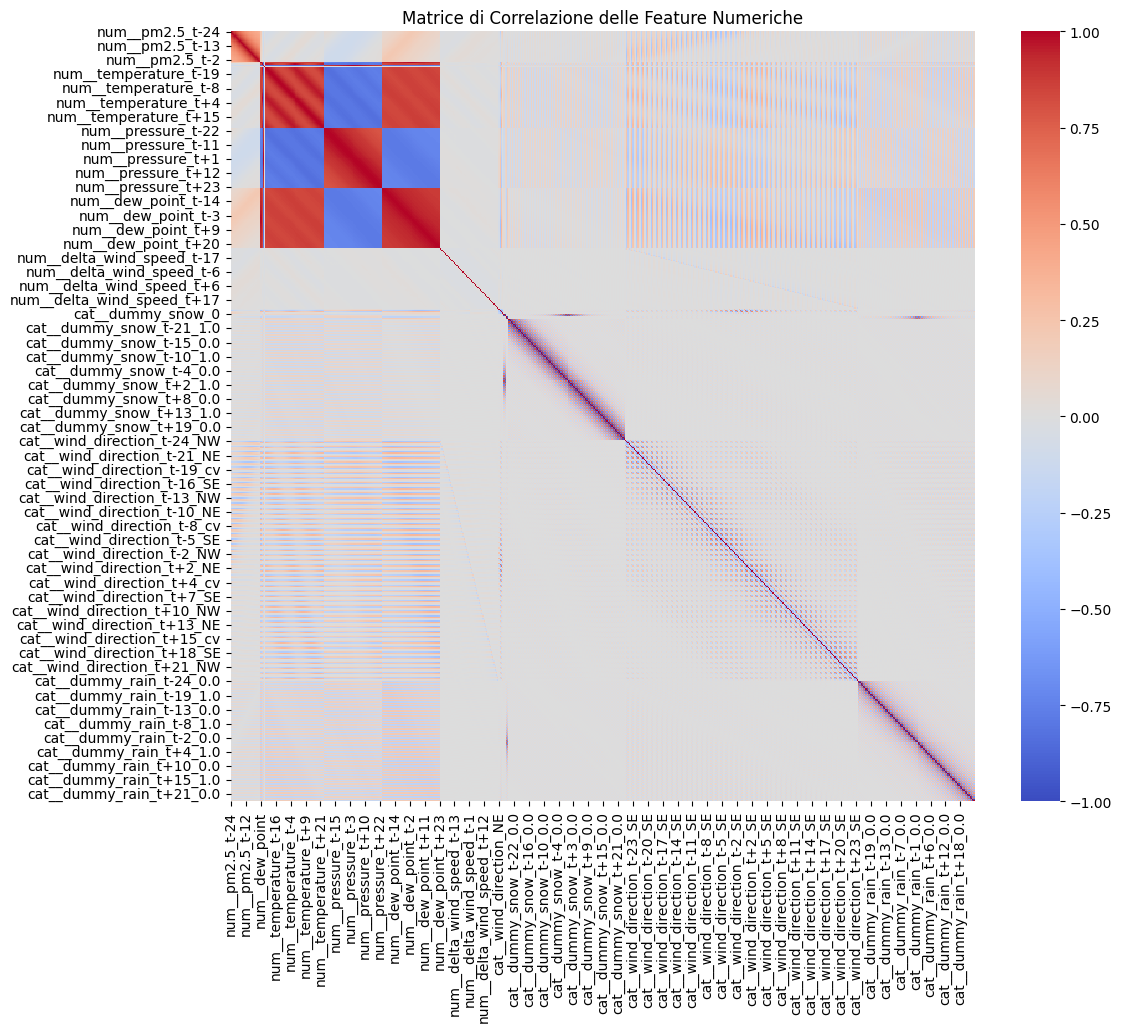

In [ ]:
feature_names_transformed = preprocessing_pipeline.get_feature_names_out()

# Crea un DataFrame dal set di training preparato con i nomi delle colonne
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_names_transformed)

# Seleziona solo le colonne numeriche
X_train_numeric = X_train_prepared_df.select_dtypes(include=np.number)

# Calcola la matrice di correlazione
correlation_matrix = X_train_numeric.corr()

# Visualizza la heatmap della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=True può essere troppo caotico per molte feature
plt.title('Matrice di Correlazione delle Feature Numeriche')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {
        'estimator__alpha': uniform(loc=0, scale=10) # Cerca lambda tra 0 e 10
    }

# Define the Ridge Regression model within MultiOutputRegressor
ridge_model = MultiOutputRegressor(Ridge())

ridge_random_search = RandomizedSearchCV(
        estimator=ridge_model,
        param_distributions=param_distributions,
        n_iter=20,  # Numero di combinazioni di parametri da provare
        cv=kf,
        scoring=r2_multi_scorer,
        random_state=42,
        n_jobs=-1   # Usa tutti i core disponibili
    )

# Fit final model
print("Running Randomized Search for Ridge...")
ridge_random_search.fit(X_train_prepared, y_train.values)
print("\nBest parameters found:", ridge_random_search.best_params_)
print("Best cross-validation R2 score:", ridge_random_search.best_score_)

# Predict with the best one
best_ridge_model = ridge_random_search.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_prepared)

# Evaluate
print("\nPerformance of the best model on the test set:")
print("Best Ridge Regression R2:", multioutput_r2(y_test.values, y_pred_best_ridge))

Running Randomized Search for Ridge...


KeyboardInterrupt: 

Running Randomized Search for Ridge...

Best parameters found: {'estimator__alpha': np.float64(9.699098521619943)}
Best cross-validation R2 score: 0.6315670965254759

Performance of the best model on the test set:
Best Ridge Regression R2: 0.6799983568576607

### Previsione di 24 ore + Ridge

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 24 ore da prevedere

In [ ]:
pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_24h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 25))
]

lr_feature_cols = pm25_1h_feature + [col for col in meteo_future_24h if col in feature_cols]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
lr_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in lr_feature_cols)
]

X_train_lr = X_train_prepared_df[lr_feature_cols_transformed]
X_test_lr = X_test_prepared_df[lr_feature_cols_transformed]

# Linear Regression su tutte le feature
lr_model = MultiOutputRegressor(LinearRegression())
print("\nCross-validation LinearRegression...")
lr_scores = cross_val_score(lr_model, X_train_lr, y_train.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", lr_scores)
print("Mean R2:", np.mean(lr_scores))

# Fit finale
lr_model.fit(X_train_lr, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_lr)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.values, y_pred_lr))


Cross-validation LinearRegression...
R2 scores: [0.54576462 0.54357322 0.53608458]
Mean R2: 0.5418074737966146

Performance finale sul test set:
LinearRegression R2: 0.5901402361820768


Cross-validation LinearRegression...
R2 scores: [0.54576462 0.54357322 0.53608458]
Mean R2: 0.5418074737966146

Performance finale sul test set:
LinearRegression R2: 0.5901402361820768

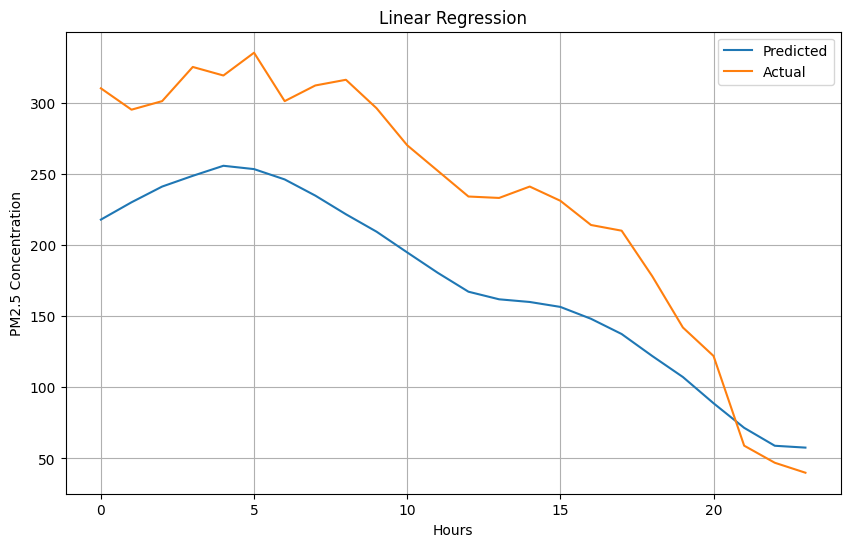

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred_lr[1], label='Predicted')
plt.plot(y_test.values[1], label='Actual')
plt.xlabel('Hours')
plt.ylabel('PM2.5 Concentration')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

Verifico multicollinearità tra alcune features

In [ ]:
X_train_numeric = X_train_prepared_df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
sns.heatmap(X_train_numeric.corr(), annot=False, cmap='coolwarm') # annot=True può essere troppo caotico per molte feature
plt.title('Matrice di Correlazione delle Feature Numeriche')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distributions = {
        'estimator__lambda': uniform(loc=0, scale=10) # Cerca lambda tra 0 e 10
    }

# Define the Ridge Regression model within MultiOutputRegressor
ridge_model = MultiOutputRegressor(Ridge())

ridge_random_search = RandomizedSearchCV(
        estimator=ridge_model,
        param_distributions=param_distributions,
        n_iter=20,  # Numero di combinazioni di parametri da provare
        cv=kf,
        scoring=r2_multi_scorer,
        random_state=42,
        n_jobs=-1   # Usa tutti i core disponibili
    )

# Fit final model
print("Running Randomized Search for Ridge...")
ridge_random_search.fit(X_train_lr, y_train.values)
print("\nBest parameters found:", ridge_random_search.best_params_)
print("Best cross-validation R2 score:", ridge_random_search.best_score_)

# Predict with the best one
best_ridge_model = ridge_random_search.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test_lr)

# Evaluate
print("\nPerformance of the best model on the test set:")
print("Best Ridge Regression R2:", multioutput_r2(y_test.values, y_pred_best_ridge))

Running Randomized Search for Ridge...

Best parameters found: {'estimator__lambda': np.float64(9.699098521619943)}
Best cross-validation R2 score: 0.5425293566161201

Performance of the best model on the test set:
Best Ridge Regression R2: 0.5902663179109781

### Previsione di 16 ore

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 16 ore da prevedere

In [ ]:
pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_16h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 17))
]

lr_feature_cols = pm25_1h_feature + [col for col in meteo_future_16h if col in feature_cols]
y_train_16 = y_train.iloc[:, :16]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
lr_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in lr_feature_cols)
]

X_train_lr = X_train_prepared_df[lr_feature_cols_transformed]
X_test_lr = X_test_prepared_df[lr_feature_cols_transformed]

# Linear Regression su tutte le feature
lr_model = MultiOutputRegressor(LinearRegression())
print("\nCross-validation LinearRegression...")
lr_scores = cross_val_score(lr_model, X_train_lr, y_train_16.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", lr_scores)
print("Mean R2:", np.mean(lr_scores))

# Fit finale
lr_model.fit(X_train_lr, y_train_16)

# Predict
y_pred_lr = lr_model.predict(X_test_lr)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.iloc[:, :16].values, y_pred_lr))

Cross-validation LinearRegression...
R2 scores: [0.561883   0.56170442 0.5509621 ]
Mean R2: 0.558183174294706

Performance finale sul test set:
LinearRegression R2: 0.6124452157093877

### Previsione di 8 ore

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 8 ore da prevedere

In [ ]:
pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_8h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 9))
]

lr_feature_cols = pm25_1h_feature + [col for col in meteo_future_8h if col in feature_cols]
y_train_8 = y_train.iloc[:, :8]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
lr_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in lr_feature_cols)
]

X_train_lr = X_train_prepared_df[lr_feature_cols_transformed]
X_test_lr = X_test_prepared_df[lr_feature_cols_transformed]

# Linear Regression su tutte le feature
lr_model = MultiOutputRegressor(LinearRegression())
print("\nCross-validation LinearRegression...")
lr_scores = cross_val_score(lr_model, X_train_lr, y_train_8.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", lr_scores)
print("Mean R2:", np.mean(lr_scores))

# Fit finale
lr_model.fit(X_train_lr, y_train_8)

# Predict
y_pred_lr = lr_model.predict(X_test_lr)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.iloc[:, :8].values, y_pred_lr))

Cross-validation LinearRegression...
R2 scores: [0.57837655 0.58778339 0.57630332]
Mean R2: 0.5808210894458847

Performance finale sul test set:
LinearRegression R2: 0.6424214724649433

## Random Forest

In [ ]:
from sklearn.decomposition import PCA

# Applica PCA solo per Random Forest
pca = PCA(n_components=0.95)  # Mantiene il 95% della varianza
X_train_pca = pca.fit_transform(X_train_prepared)
X_test_pca = pca.transform(X_test_prepared)

print("Shape after PCA:", X_train_pca.shape)

Shape after PCA: (27658, 129)


### Tentativo con PCA

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest su feature ridotte (PCA)
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=20, random_state=42))
print("\nCross-validation RandomForestRegressor (con PCA)...")
rf_scores = cross_val_score(rf_model, X_train_pca, y_train.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", rf_scores)
print("Mean R2:", np.mean(rf_scores))

# Fit finale
rf_model.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_pca)

# Valutazione
print("RandomForestRegressor R2 (con PCA):", multioutput_r2(y_test.values, y_pred_rf))

Cross-validation RandomForestRegressor (con PCA)...
R2 scores: [0.76623517 0.7607541  0.75670572]
Mean R2: 0.7612316619687763
RandomForestRegressor R2 (con PCA): 0.6152795396783842

In [ ]:
plt.plot(y_pred_rf[1])
plt.plot(y_test.values[1])
plt.show()

### Previsione di 24 ore

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 24 ore da prevedere

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_24h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 25))
]

rf_feature_cols = pm25_1h_feature + [col for col in meteo_future_24h if col in feature_cols]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
rf_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in rf_feature_cols)
]

X_train_rf = X_train_prepared_df[rf_feature_cols_transformed]
X_test_rf = X_test_prepared_df[rf_feature_cols_transformed]

# Random Forest su feature ridotte (PCA)
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42))
print("\nCross-validation RandomForestRegressor (con PCA)...")
rf_scores = cross_val_score(rf_model, X_train_rf, y_train.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", rf_scores)
print("Mean R2:", np.mean(rf_scores))

# Fit finale
rf_model.fit(X_train_rf, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.values, y_pred_rf))


Cross-validation RandomForestRegressor (con PCA)...
R2 scores: [0.71705626 0.71114374 0.70687962]
Mean R2: 0.7116932065957685

Performance finale sul test set:
LinearRegression R2: 0.6564239451984233


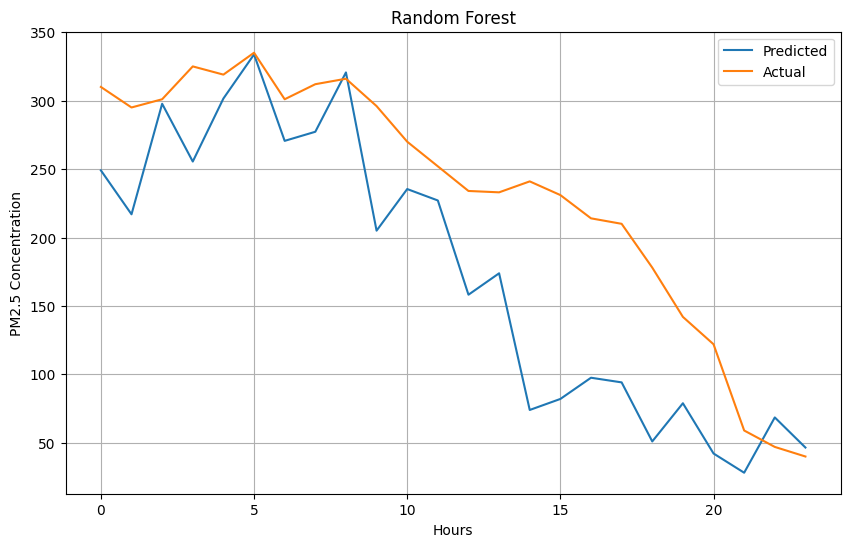

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred_rf[1], label='Predicted')
plt.plot(y_test.values[1], label='Actual')
plt.xlabel('Hours')
plt.ylabel('PM2.5 Concentration')
plt.title('Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### Previsione di 16 ore

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 16 ore da prevedere

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_16h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 17))
]

rf_feature_cols = pm25_1h_feature + [col for col in meteo_future_16h if col in feature_cols]
y_train_16 = y_train.iloc[:, :16]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
rf_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in rf_feature_cols)
]

X_train_rf = X_train_prepared_df[rf_feature_cols_transformed]
X_test_rf = X_test_prepared_df[rf_feature_cols_transformed]

# Random Forest su feature ridotte (PCA)
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42))
print("\nCross-validation RandomForestRegressor (con PCA)...")
rf_scores = cross_val_score(rf_model, X_train_rf, y_train_16.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", rf_scores)
print("Mean R2:", np.mean(rf_scores))

# Fit finale
rf_model.fit(X_train_rf, y_train_16)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.iloc[:, :16].values, y_pred_rf))

Cross-validation RandomForestRegressor (con PCA)...
R2 scores: [0.72160287 0.72371946 0.71079673]
Mean R2: 0.7187063514396378

Performance finale sul test set:
LinearRegression R2: 0.6837244397694822

### Previsione di 8 ore

Input:
- concentrazione pm2.5 dell'ora precedente
- dati meteo delle 8 ore da prevedere

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pm25_1h_feature = ['pm2.5_t-1']

# --- Selezione delle colonne ---
meteo_future_8h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 9))
]

rf_feature_cols = pm25_1h_feature + [col for col in meteo_future_8h if col in feature_cols]
y_train_8 = y_train.iloc[:, :8]

# --- Estrazione delle feature già preprocessate ---
feature_cols_transformed = preprocessor.get_feature_names_out()
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)
X_test_prepared_df = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)

# Ora cerca le colonne che corrispondono a quelle che ti interessano
rf_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in rf_feature_cols)
]

X_train_rf = X_train_prepared_df[rf_feature_cols_transformed]
X_test_rf = X_test_prepared_df[rf_feature_cols_transformed]

# Random Forest su feature ridotte (PCA)
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=42))
print("\nCross-validation RandomForestRegressor (con PCA)...")
rf_scores = cross_val_score(rf_model, X_train_rf, y_train_8.values, cv=kf, scoring=r2_multi_scorer)
print("R2 scores:", rf_scores)
print("Mean R2:", np.mean(rf_scores))

# Fit finale
rf_model.fit(X_train_rf, y_train_8)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Valutazione
print("\nPerformance finale sul test set:")
print("LinearRegression R2:", multioutput_r2(y_test.iloc[:, :8].values, y_pred_rf))


Cross-validation RandomForestRegressor (con PCA)...
R2 scores: [0.72924543 0.74197583 0.73264863]
Mean R2: 0.7346232931788288

Performance finale sul test set:
LinearRegression R2: 0.7178371605993756


Cross-validation RandomForestRegressor (con PCA)...
R2 scores: [0.72924543 0.74197583 0.73264863]
Mean R2: 0.7346232931788288

Performance finale sul test set:
LinearRegression R2: 0.7178371605993756

## Prove fatte per vedere importanza variabili

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Scegli un target (il primo della lista)
single_target_col = target_cols[0]
y_train_single = y_train[single_target_col]
y_test_single = y_test[single_target_col]

# Inizializza il modello
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation (usa R² come metrica)
scores = cross_val_score(rf, X_train_prepared, y_train_single, cv=2, scoring='r2', n_jobs=-1)
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {scores.mean():.4f}")

# Fit finale sul training set
rf.fit(X_train_prepared, y_train_single)

# Calcolo feature importance
importances = rf.feature_importances_

# Ordina per importanza decrescente
indices = np.argsort(importances)[::-1]

# Visualizza le prime 20 feature più importanti
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()






NOTA: possiamo ridurre il numero di colonne dopo questo studio per esempio selezionando le migliori 20, oppure possiamo eseguire la PCA per tenere le variabili che rappresentano il 95% della varianza totale.

In [ ]:
# Ottieni i nomi delle feature trasformate
feature_names = preprocessing_pipeline.get_feature_names_out()
# Prendi i nomi delle 20 feature più importanti
top_features = [feature_names[i] for i in indices[:20]]

# Visualizza il grafico con etichette
plt.figure(figsize=(12, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]])
plt.xticks(ticks=range(20), labels=top_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor # Ensure this is imported

# Scegli un target (il primo della lista)
single_target_col = target_cols[0]
# Passare la colonna come DataFrame per mantenere le 2 dimensioni
y_train_single_df = y_train[[single_target_col]] # <--- Modified line
y_test_single_df = y_test[[single_target_col]]   # <--- Added for consistency, though not strictly needed for CV

# Inizializza il modello
rf = MultiOutputRegressor(LinearRegression())

# Cross-validation (usa R² come metrica)
# Usare y_train_single_df che è un DataFrame (2D)
scores = cross_val_score(rf, X_train_prepared, y_train_single_df, cv=2, scoring='r2', n_jobs=-1) # <--- Modified line
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R²: {scores.mean():.4f}")

# Fit finale sul training set
# Anche qui, usare y_train_single_df per il fit
rf.fit(X_train_prepared, y_train_single_df) # <--- Modified line

# Calcolo feature importance
# La feature_importances_ è un attributo del RandomForestRegressor sottostante,
# non della LinearRegression all'interno del MultiOutputRegressor.
# LinearRegression non ha un attributo feature_importances_.
# Questo blocco causerà un AttributeError se si usa LinearRegression.
# Se si vuole analizzare l'importanza per Linear Regression, si possono guardare i coefficienti (coef_).

# Rimuovi o commenta il blocco seguente se usi LinearRegression:
importances = rf.estimators_[0].feature_importances_
#
# # Ordina per importanza decrescente
indices = np.argsort(importances)[::-1]
#
# # Visualizza le prime 20 feature più importanti
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
# The error suggests Feature Index, but it should be Feature Name or Index from X_train_prepared
plt.ylabel("Importance")
plt.show()

# If you were using RandomForestRegressor inside MultiOutputRegressor:
# You would access importances via rf.estimators_[i].feature_importances_ for each target.
# For a single target as used here, it would be rf.estimators_[0].feature_importances_

# If you want to see coefficients for Linear Regression for the single target:
if isinstance(rf.estimator, LinearRegression):
    # Access the fitted Linear Regression model for the first target
    fitted_lr_model = rf.estimators_[0]
    coefficients = fitted_lr_model.coef_

    # Assuming you want to see coefficients corresponding to the preprocessed features
    # Getting feature names after ColumnTransformer is a bit more involved
    # For simplicity here, we just look at the coefficient values
    print("\nLinear Regression Coefficients for", single_target_col)
    # print(coefficients) # Print all coefficients

    # If you want to visualize coefficients (similar to importances):
    # You would need the names of the features after preprocessing.
    # Getting these names from the ColumnTransformer can be done but adds complexity.
    # For now, just showing the concept of accessing coefficients.

In [ ]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf, prefit=True, threshold="median")  # o scegli un percentile
X_train_reduced = selector.transform(X_train_prepared)
X_test_reduced = selector.transform(X_test_prepared)


## *HistGradientBoostingRegressor*

Si ha optato per HistGradientBoosting invece di XGBoost in quanto il dataset è enorme e il tempo di calcolo e ottimizzazione risultava troppo lungo con XGBoost, mentre con Hist siamo riusciti a ridurre il tempo di addestramento ottenendo risultati molto simili.

### Prova 1 : input: 24h di previsioni meteo + 1h di pm2.5 , output: 24h di pm2.5

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# --- Selezione delle colonne ---
meteo_future_24h = [
    col for col in feature_cols
    if any(x in col for x in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and any(f"_t+{i}" in col for i in range(1, 25))
]

# Lista feature originali da selezionare
hist_feature_cols = ['pm2.5_t-1'] + meteo_future_24h

# Ottieni nomi feature preprocessate dalla pipeline (ColumnTransformer)
feature_cols_transformed = preprocessor.get_feature_names_out()

# Seleziona le colonne preprocessate corrispondenti a quelle originali di interesse
hist_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(base_col in col for base_col in hist_feature_cols)
]

# Estrai le feature preprocessate specifiche in DataFrame
X_train_hist = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]
X_test_hist = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]

print(f"Shape X_train_hist: {X_train_hist.shape}")
print(f"Shape X_test_hist: {X_test_hist.shape}")


hgb_base = HistGradientBoostingRegressor(random_state=42)

multioutput_hgb = MultiOutputRegressor(hgb_base)

# Alleno con y_train (shape (n_samples, n_targets))
multioutput_hgb.fit(X_train_hist, y_train)

# Previsioni sul test set
y_pred = multioutput_hgb.predict(X_test_hist)

print("Shape predizioni:", y_pred.shape)

Shape X_train_hist: (27658, 287)
Shape X_test_hist: (6915, 287)
Shape predizioni: (6915, 24)


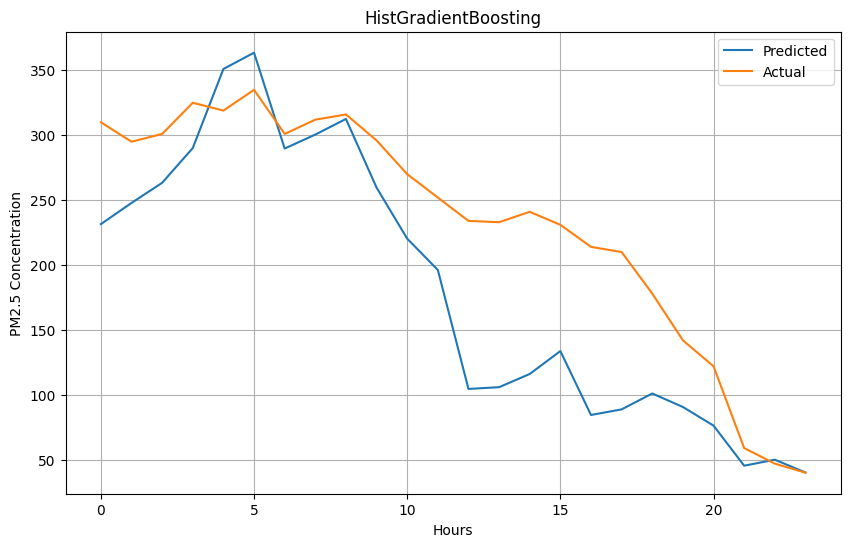

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred[1], label='Predicted')
plt.plot(y_test.values[1], label='Actual')
plt.xlabel('Hours')
plt.ylabel('PM2.5 Concentration')
plt.title('HistGradientBoosting')
plt.legend()
plt.grid(True)
plt.show()

Stampa dei principali parametri di valutazione modello

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics



mae_list = []
rmse_list = []
r2_list = []

for i in range(y_test.shape[1]):
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    # Calculate MSE first
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    # Calculate RMSE by taking the square root of MSE
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[:, i], y_pred[:, i])

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

# Media delle metriche
print("=== Risultati medi su tutte le ore ===")
print(f"MAE medio:  {np.mean(mae_list):.3f}")
print(f"RMSE medio: {np.mean(rmse_list):.3f}")
print(f"R² medio:   {np.mean(r2_list):.3f}")

# Plot dei risultati per ogni ora
hours = np.arange(1, 25)
plt.figure(figsize=(12, 5))
plt.plot(hours, r2_list, marker='o', label='R² per ora')
plt.plot(hours, mae_list, marker='s', label='MAE per ora')
plt.plot(hours, rmse_list, marker='^', label='RMSE per ora')
plt.xticks(hours)
plt.xlabel("Ora del giorno (t+1 → t+24)")
plt.ylabel("Metriche")
plt.title("Prestazioni del modello per ogni ora")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


=== Risultati medi su tutte le ore ===
MAE medio:  33.930
RMSE medio: 48.561
R² medio:   0.711

Ottimizzazione bayesiana degli iperparametri

In [ ]:
from skopt import BayesSearchCV
from skopt.callbacks import VerboseCallback
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
import pandas as pd
import time

# 1. Setup modello e CV
hgb_base = HistGradientBoostingRegressor(random_state=42)
multioutput_hgb = MultiOutputRegressor(hgb_base)

tscv = TimeSeriesSplit(n_splits=3)

param_space = {
    'estimator__learning_rate': (0.01, 0.1, 'log-uniform'),
    'estimator__max_depth': (4, 10),
    'estimator__max_iter': (100, 300),
    'estimator__max_leaf_nodes': (20, 60),
    'estimator__min_samples_leaf': (10, 50)
}

# 2. Callback leggera per la stampa live
def status_print(optim_result):
    try:
        results_df = pd.DataFrame(bayes_search.cv_results_)
        best_idx = results_df['rank_test_score'].argmin()
        best_score = results_df.loc[best_idx, 'mean_test_score']
        best_params = results_df.loc[best_idx, 'params']
        print(f"Iterazione {len(results_df)} completata. Best R² corrente: {best_score:.4f}")
        print(f"Parametri migliori finora: {best_params}\n")
    except:
        print("Iterazione completata, ma i risultati non sono ancora accessibili.\n")

# 3. Campionamento 20% ordinato
subset_size = int(len(X_train_hist) * 0.3)
X_train_subset = X_train_hist[:subset_size]
y_train_subset = y_train[:subset_size]

# 4. Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=multioutput_hgb,
    search_spaces=param_space,
    n_iter=25,  # meno iterazioni per rapidità
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# 5. Esecuzione e misurazione tempo
start_time = time.time()
bayes_search.fit(X_train_subset, y_train_subset, callback=[status_print])
end_time = time.time()

# 6. Salvataggio log
results_df = pd.DataFrame(bayes_search.cv_results_)
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
csv_name = f"bayes_search_hgb_log_{timestamp}.csv"
results_df.to_csv(csv_name, index=False)

# 7. Risultati finali
print("\n=== Risultati Finali ===")
print("Tempo totale: {:.2f} secondi".format(end_time - start_time))
print("Migliori parametri trovati:", bayes_search.best_params_)
print("Miglior punteggio CV (R²):", round(bayes_search.best_score_, 4))
print(f"Log completo salvato in: {csv_name}")


=== Risultati Finali ===
Tempo totale: 6268.09 secondi
Migliori parametri trovati: OrderedDict([('estimator__learning_rate', 0.020363398781906857), ('estimator__max_depth', 10), ('estimator__max_iter', 100), ('estimator__max_leaf_nodes', 20), ('estimator__min_samples_leaf', 24)])
Miglior punteggio CV (R²): 0.3741

Abbiamo ottenuto un risultato peggiore rispetto agli iperparametri forniti inizialmente a fronte di un tempo di calcolo di quasi 2h. Per questo motivo manteniamo gli iperparametri di default, che comunque avevano dato risultati soddisfacenti.

In [ ]:
log_df = pd.read_csv("bayes_search_hgb_log_20250611_112152.csv")
print(log_df)

### Prova 2 : input: 16h di previsioni meteo + 1h di pm2.5 , output: 16h di pm2.5

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import re

# Filtra colonne meteo fino a +16h
meteo_future_16h = [
    col for col in feature_cols
    if any(var in col for var in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and (match := re.search(r'_t\+(\d+)', col)) and int(match.group(1)) <= 16
]

# Feature da usare (incluso pm2.5_t-1)
hist_feature_cols = ['pm2.5_t-1'] + meteo_future_16h

# Nomi feature dopo preprocessing
feature_cols_transformed = preprocessor.get_feature_names_out()

# Prendi solo le colonne preprocessate corrispondenti alle feature selezionate
hist_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(col.endswith(f"__{base_col}") or f"__{base_col}_" in col for base_col in hist_feature_cols)
]

# Estrai le feature filtrate dal dataset preprocessato
X_train_hist = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]
X_test_hist = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]

# Target limitato a 16 ore
y_train_16 = y_train.iloc[:, :16]
y_test_16 = y_test[:, :16]

# Modello base
hgb_base = HistGradientBoostingRegressor(random_state=42)
multioutput_hgb = MultiOutputRegressor(hgb_base)

# Fit sul training limitato
multioutput_hgb.fit(X_train_hist, y_train_16)

# Previsioni
y_pred = multioutput_hgb.predict(X_test_hist)
print("Shape predizioni:", y_pred.shape)

mae_list, rmse_list, r2_list = [], [], []

for i in range(y_pred.shape[1]):
    mae = mean_absolute_error(y_test_16[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test_16[:, i], y_pred[:, i]))
    r2 = r2_score(y_test_16[:, i], y_pred[:, i])
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

print("=== Metriche medie (16 ore) ===")
print(f"MAE:  {np.mean(mae_list):.3f}")
print(f"RMSE: {np.mean(rmse_list):.3f}")
print(f"R²:   {np.mean(r2_list):.3f}")



=== Risultati medi su tutte le ore predette (16 ore) ===
MAE:  41.100
RMSE: 58.494
R²:   0.581

### Prova 3 : input: 8h di previsioni meteo + 1h di pm2.5 , output: 8h di pm2.5

In [ ]:
# Filtra colonne meteo fino a +8h
meteo_future_8h = [
    col for col in feature_cols
    if any(var in col for var in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and (match := re.search(r'_t\+(\d+)', col)) and int(match.group(1)) <= 8
]

# Feature da usare (incluso pm2.5_t-1)
hist_feature_cols = ['pm2.5_t-1'] + meteo_future_8h

# Nomi feature dopo preprocessing
feature_cols_transformed = preprocessor.get_feature_names_out()

# Prendi solo le colonne preprocessate corrispondenti alle feature selezionate
hist_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(col.endswith(f"__{base_col}") or f"__{base_col}_" in col for base_col in hist_feature_cols)
]

# Estrai le feature filtrate dal dataset preprocessato
X_train_hist = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]
X_test_hist = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]

# Target limitato a 8 ore
y_train_8 = y_train.iloc[:, :8]
y_test_8 = y_test[:, :8]

# Modello base
hgb_base = HistGradientBoostingRegressor(random_state=42)
multioutput_hgb = MultiOutputRegressor(hgb_base)

# Fit sul training limitato
multioutput_hgb.fit(X_train_hist, y_train_8)

# Previsioni
y_pred = multioutput_hgb.predict(X_test_hist)
print("Shape predizioni:", y_pred.shape)

mae_list, rmse_list, r2_list = [], [], []

for i in range(y_pred.shape[1]):
    mae = mean_absolute_error(y_test_8[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test_8[:, i], y_pred[:, i]))
    r2 = r2_score(y_test_8[:, i], y_pred[:, i])
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

print("=== Metriche medie (8 ore) ===")
print(f"MAE:  {np.mean(mae_list):.3f}")
print(f"RMSE: {np.mean(rmse_list):.3f}")
print(f"R²:   {np.mean(r2_list):.3f}")


=== Risultati medi su tutte le ore predette (8 ore) ===
MAE:  42.648
RMSE: 60.711
R²:   0.548

### Prova 4 : input: 4h di previsioni meteo + 1h di pm2.5 , output: 4h di pm2.5

In [ ]:
# Filtra colonne meteo fino a +4h
meteo_future_4h = [
    col for col in feature_cols
    if any(var in col for var in ['temperature', 'dummy_snow', 'wind_direction', 'pressure', 'dew_point', 'dummy_rain', 'delta_wind_speed'])
    and (match := re.search(r'_t\+(\d+)', col)) and int(match.group(1)) <= 4
]

# Feature da usare (incluso pm2.5_t-1)
hist_feature_cols = ['pm2.5_t-1'] + meteo_future_4h

# Nomi feature dopo preprocessing
feature_cols_transformed = preprocessor.get_feature_names_out()

# Prendi solo le colonne preprocessate corrispondenti alle feature selezionate
hist_feature_cols_transformed = [
    col for col in feature_cols_transformed
    if any(col.endswith(f"__{base_col}") or f"__{base_col}_" in col for base_col in hist_feature_cols)
]

# Estrai le feature filtrate dal dataset preprocessato
X_train_hist = pd.DataFrame(X_train_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]
X_test_hist = pd.DataFrame(X_test_prepared, columns=feature_cols_transformed)[hist_feature_cols_transformed]

# Target limitato a 4 ore
y_train_4 = y_train.iloc[:, :4]
y_test_4 = y_test[:, :4]

# Modello base
hgb_base = HistGradientBoostingRegressor(random_state=42)
multioutput_hgb = MultiOutputRegressor(hgb_base)

# Fit sul training limitato
multioutput_hgb.fit(X_train_hist, y_train_4)

# Previsioni
y_pred = multioutput_hgb.predict(X_test_hist)
print("Shape predizioni:", y_pred.shape)

mae_list, rmse_list, r2_list = [], [], []

for i in range(y_pred.shape[1]):
    mae = mean_absolute_error(y_test_4[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test_4[:, i], y_pred[:, i]))
    r2 = r2_score(y_test_4[:, i], y_pred[:, i])
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

print("=== Metriche medie (4 ore) ===")
print(f"MAE:  {np.mean(mae_list):.3f}")
print(f"RMSE: {np.mean(rmse_list):.3f}")
print(f"R²:   {np.mean(r2_list):.3f}")


=== Risultati medi su tutte le ore predette (4 ore) ===
MAE:  43.248
RMSE: 61.273
R²:   0.538